In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El archivo ya existe
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/laureano/Documentos/met2021/metnum-1c2021-tp3/tp3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/laureano/Documentos

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/laureano/Documentos/met2021/metnum-1c2021-tp3/notebooks
Python 3.8.5


In [104]:
df = pd.read_csv('../data/train.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

In [106]:
df['lng'].max()

121.036

In [93]:
df.info
escuelascercanasmax = df['escuelascercanas'].max()
print(escuelascercanasmax)

1.0


In [113]:
#df.groupby(['ciudad']).count().sort
conlatitud = df[df['lat'].notnull()]
conlatitud.info()
ciudades = conlatitud['ciudad'].value_counts()[:10].index.tolist()
print(type(ciudades))
print(ciudades)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116512 entries, 1 to 239998
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          116512 non-null  int64  
 1   titulo                      115429 non-null  object 
 2   descripcion                 115870 non-null  object 
 3   tipodepropiedad             116497 non-null  object 
 4   direccion                   91738 non-null   object 
 5   ciudad                      116346 non-null  object 
 6   provincia                   116475 non-null  object 
 7   antiguedad                  96656 non-null   float64
 8   habitaciones                105313 non-null  float64
 9   garages                     97989 non-null   float64
 10  banos                       104144 non-null  float64
 11  metroscubiertos             107824 non-null  float64
 12  metrostotales               91509 non-null   float64
 13  idzona        

In [114]:
from math import cos, asin, sqrt, pi, radians

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    
    if a < 0:
        a = 0
    if sqrt(a)>1 or sqrt(a)<0:
        print(a)
        
    a = min(1,sqrt(a))
    a = max(0,a)
    return 12742 * asin(a) #2Rasin...

In [117]:

maximas_distancias_por_ciudad = []
latitudes = []
for ciudad in ciudades:
    print(ciudad)
    tmp = conlatitud[conlatitud['ciudad'] == ciudad].dropna()
    tmp = tmp[tmp['lat'] != 0.0] # Saco los que no sirven
    print(tmp['lat'].max())
    latitudes_tmp = tmp['lat'].tolist()
    print(max(latitudes_tmp))
    if latitudes == latitudes_tmp:
        print("Son iguales")
    latitudes = latitudes_tmp
    longitudes_tmp = tmp['lng'].tolist()
    maximadist = 0
    tmp_i = 0
    tmp_j = 0
    for i in range(len(latitudes_tmp)):
        for j in range(i):
            actual = distance(latitudes_tmp[i],longitudes_tmp[i],latitudes_tmp[j],longitudes_tmp[j])
            if maximadist < actual:
                maximadist = actual
                tmp_i = i
                tmp_j = j
                
    maximas_distancias_por_ciudad.append(maximadist)
    print(tmp_i,tmp_j)
    print(latitudes_tmp[tmp_i],longitudes_tmp[tmp_i],latitudes_tmp[tmp_j],longitudes_tmp[tmp_j])

print(maximas_distancias_por_ciudad)
maximas_distancias_por_ciudad.sort()
print(maximas_distancias_por_ciudad)
    

Zapopan
32.4917809
32.4917809
965 633
17.0504421 -96.7434027 32.4917809 -116.9549473
Benito Juárez
29.1118757
29.1118757
1304 180
19.2711421 -98.28775949999999 29.1118757 -110.9689894
Querétaro
43.4915962
43.4915962
1078 947
17.546319966667 -99.487726566667 43.4915962 11.3906284
Cuauhtémoc
31.704174666666997
31.704174666666997
1285 29
19.26701410046952 -99.17167552750857 31.704174666666997 -106.47529306667
Alvaro Obregón
20.6722729
20.6722729
1395 879
20.6722729 -101.34437130000003 19.000813333333 -98.998068333333
Tlalpan
20.911941
20.911941
1043 1035
20.911941 -100.7323466 19.1360866 -99.1739857
San Luis Potosí
43.3889678
43.3889678
659 185
43.3889678 -4.10918 21.8918376 -101.44772899999998
Miguel Hidalgo
19.590187513705853
19.590187513705853
963 831
16.589999900000002 -93.02693999999997 19.590187513705853 -100.01561781224363
Coyoacán
24.746285486182977
24.746285486182977
429 271
19.67140628595914 -98.09754363967285 24.746285486182977 -106.93489551250002
Naucalpan de Juárez
28.6233332

In [5]:
df = df[df['ciudad']=='Mérida'].dropna()

In [6]:
x = df['metroscubiertos'].values

In [7]:
y = df['precio'].values

In [8]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [9]:
x.shape

(518, 1)

In [10]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()



In [11]:
linear_regressor.fit(x,y)

In [12]:
df['prediction'] = linear_regressor.predict(x)

[[8507.59724848]]


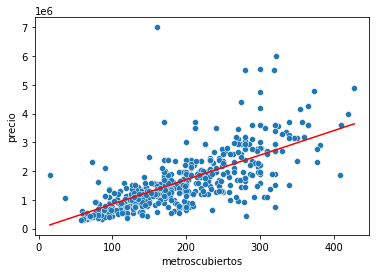

In [13]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')
mostra = linear_regressor.get_X()
print(mostra)

In [14]:
print(df['prediction'])

263       1.080465e+06
967       1.165541e+06
2002      1.471814e+06
2193      9.868813e+05
3656      1.871671e+06
              ...     
238252    1.157033e+06
238595    1.403754e+06
238761    1.693012e+06
239568    9.528509e+05
239785    1.684504e+06
Name: prediction, Length: 518, dtype: float64


In [19]:
print(df['prediction'])

263       1.023693e+06
967       1.114664e+06
2002      1.442161e+06
2193      9.236241e+05
3656      1.869727e+06
              ...     
238252    1.105567e+06
238595    1.369384e+06
238761    1.678687e+06
239568    8.872355e+05
239785    1.669590e+06
Name: prediction, Length: 518, dtype: float64
